## Personalized Recommendation System Using Different Algorithms

## Importing Libraries

In [ ]:
#import the reqired libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')

##  Extract the dataset

In [ ]:
df_elec=pd.read_csv("datasets/electronics.csv")
df_cloth=pd.read_csv("datasets/modcloth.csv")

### Electronics

In [ ]:
df_elec.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


as you can see electronics dataframe we are mainly concentrating on item_id, user_id and rating columns
* **item_id** => item_id is the unique id of the each item
* **user_id** => Each user is represented by a unique id
* **rating**    => The rating of item which user has given

In [ ]:
print('Shape: ', df_elec.shape, '\n')
df_elec.info()

Shape:  (1292954, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
item_id       1292954 non-null int64
user_id       1292954 non-null int64
rating        1292954 non-null float64
timestamp     1292954 non-null object
model_attr    1292954 non-null object
category      1292954 non-null object
brand         331120 non-null object
year          1292954 non-null int64
user_attr     174124 non-null object
split         1292954 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


###  Clothing

In [ ]:
df_cloth.head()

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [ ]:
print('Shape: ', df_cloth.shape, '\n')
df_cloth.info()

Shape:  (99893, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99893 entries, 0 to 99892
Data columns (total 12 columns):
item_id       99893 non-null int64
user_id       99892 non-null object
rating        99893 non-null int64
timestamp     99893 non-null object
size          78133 non-null float64
fit           81387 non-null object
user_attr     91526 non-null object
model_attr    99893 non-null object
category      99893 non-null object
brand         25913 non-null object
year          99893 non-null int64
split         99893 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 9.1+ MB


## Replacing user_id with Numbers

In [ ]:
# replacing user_id with numbers in modcloth dataset
encode={}
li=[]
# last user_id of electronics dataset
last_id=1157632
for i in df_cloth['user_id']:
    if i in encode.keys():
        li.append(encode[i])
        continue
    last_id+=1
    encode[i]=last_id
    li.append(last_id)
df_cloth['user_id']=li
df_cloth.head()

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,1157633,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,1157634,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,1157635,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,1157636,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,1157637,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [ ]:
# copying the data we collected and printing the no of rows of columns of both dataframes
df_elec_rating=df_elec[['item_id','user_id','rating','category']].copy()
df_cloth_rating=df_cloth[['item_id','user_id','rating','category']].copy()
print("shape of electronics dataset",df_elec_rating.shape)
print("shape of modcloth dataset",df_cloth_rating.shape)

shape of electronics dataset (1292954, 4)
shape of modcloth dataset (99893, 4)


## Combining the both dataframes

In [ ]:
# combining the both electronics and modcloth dataframes as single data
df_rating=pd.concat([df_elec_rating,df_cloth_rating],ignore_index=True)

## Statistics of combined dataframe

In [ ]:
# summary statistics of rating variable
df_rating.describe()['rating']

count    1.392847e+06
mean     4.062822e+00
std      1.361083e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [ ]:
# checking for null values in dataframe
print('Number of missing values across columns:\n',df_rating.isnull().sum())

Number of missing values across columns:
 item_id     0
user_id     0
rating      0
category    0
dtype: int64


In [ ]:
# checking for duplicated rows in dataframe
print('Number of Duplicate values across rows:',df_rating.duplicated(['item_id','user_id','rating','category']).sum())

Number of Duplicate values across rows: 0


In [ ]:
#printing the total ratings and count of unique users,items,categories
print("Total ratings:",df_rating.shape[0],"ratings")
print("Total number of unique items are: ",len(np.unique(df_rating['item_id'])),"items")
print("Total number of unique users are: ",len(np.unique(df_rating['user_id'])),"users")
print("Total number of item categories are: ",len(np.unique(df_rating['category'])),"categories")

Total ratings: 1392847 ratings
Total number of unique items are:  10578 items
Total number of unique users are:  1202417 users
Total number of item categories are:  14 categories


# Visualizations on dataset

##  Categories

In [ ]:
# Create a function to find categories in the dataset

categories = {} # create a dictionary to store different category values

def find_categories():
    for category in df_rating['category']:
        if category in categories:
            categories[category]=categories[category]+1
        else:
            categories[category]=1
    for i,category in enumerate(categories.keys()):
        print(i+1,category,"==>",categories[category],"records")
print("The total categories in the dataset are: ")
find_categories()

The total categories in the dataset are: 
1 Portable Audio & Video ==> 143370 records
2 Computers & Accessories ==> 322938 records
3 Headphones ==> 359334 records
4 Camera & Photo ==> 192573 records
5 Television & Video ==> 32057 records
6 Home Audio ==> 24193 records
7 Accessories & Supplies ==> 158598 records
8 Car Electronics & GPS ==> 33070 records
9 Security & Surveillance ==> 10806 records
10 Wearable Technology ==> 16015 records
11 Dresses ==> 34160 records
12 Outerwear ==> 7131 records
13 Bottoms ==> 23625 records
14 Tops ==> 34977 records


In [ ]:
categories

{'Accessories & Supplies': 158598,
 'Bottoms': 23625,
 'Camera & Photo': 192573,
 'Car Electronics & GPS': 33070,
 'Computers & Accessories': 322938,
 'Dresses': 34160,
 'Headphones': 359334,
 'Home Audio': 24193,
 'Outerwear': 7131,
 'Portable Audio & Video': 143370,
 'Security & Surveillance': 10806,
 'Television & Video': 32057,
 'Tops': 34977,
 'Wearable Technology': 16015}

##  Ratings

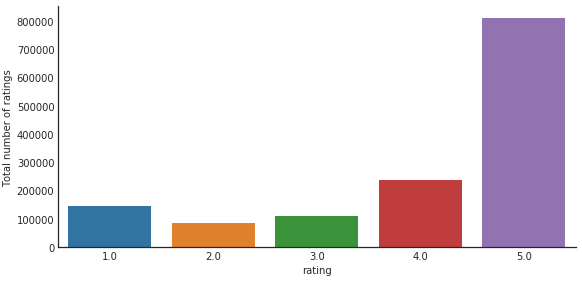

In [ ]:
# check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=df_rating, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

## WordCloud

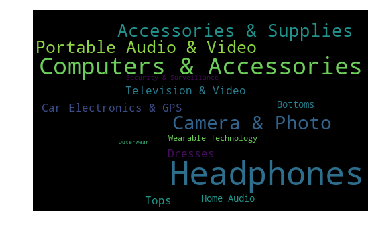

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=500, height=300, background_color = 'black', min_font_size=7).generate_from_frequencies(categories)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##  Heavily rated items

In [ ]:
df_avg_ratings = pd.DataFrame(df_rating.groupby(['item_id','category'])['rating'].mean())
df_avg_ratings['total ratings'] = pd.DataFrame(df_rating.groupby(['item_id','category'])['rating'].count())
df_avg_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)
df_avg_ratings.sort_values('total ratings', ascending=False).head(10)

,,mean ratings,total ratings
item_id,category,,
7780,Portable Audio & Video,4.400911,28530
2031,Computers & Accessories,4.418184,9393
1575,Headphones,4.218743,8622
2279,Computers & Accessories,4.168844,6278
2486,Computers & Accessories,4.306368,5810
2340,Headphones,4.625734,5790
5795,Headphones,3.921318,5554
1715,Accessories & Supplies,4.797337,5482
1124,Computers & Accessories,3.998879,5353


##  Highly rated items

In [ ]:
df_avg_ratings.sort_values(['mean ratings','total ratings'], ascending=False).head(10)

,,mean ratings,total ratings
item_id,category,,
2513,Camera & Photo,5.0,135
2789,Camera & Photo,5.0,27
1513,Camera & Photo,5.0,23
3121,Accessories & Supplies,5.0,16
4463,Camera & Photo,5.0,16
9459,Computers & Accessories,5.0,16
3216,Computers & Accessories,5.0,15
8657,Computers & Accessories,5.0,15
3696,Computers & Accessories,5.0,14


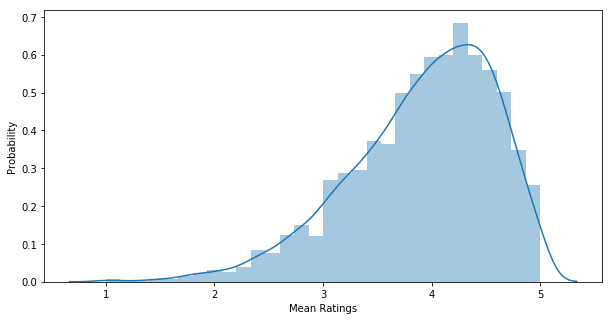

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_avg_ratings['mean ratings'], bins=30)
plt.xlabel('Mean Ratings')
plt.ylabel('Probability')
plt.show()

##  Mean ratings VS Total no.of Ratings

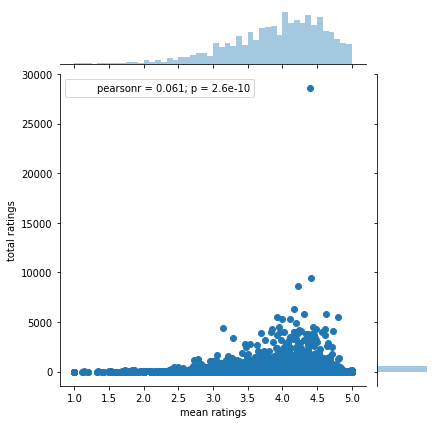

In [ ]:
sns.jointplot(x = 'mean ratings', y = 'total ratings', data = df_avg_ratings )

#  Taking subset of dataset to make it denser

In [ ]:
#Check the top 10 users based on ratings
most_rated=df_rating.groupby('user_id').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 user_id
1160256    250
1161835    204
1159573    198
1163125    197
1160497    191
1158518    188
1159908    187
1160045    184
1160433    184
1160342    177
dtype: int64


In [ ]:
counts=df_rating.user_id.value_counts()
df_most_rated_users=df_rating[df_rating.user_id.isin(counts[counts>=50].index)]
print('Number of users who have rated 50 or more items =', len(df_most_rated_users))
print('Number of unique users in the final data = ', df_most_rated_users['user_id'].nunique())
print('Number of unique products in the final data = ', df_most_rated_users['item_id'].nunique())

Number of users who have rated 50 or more items = 14258
Number of unique users in the final data =  153
Number of unique products in the final data =  935


df_most_rated_users contains users who have rated morethan 50 items

taking subset of dataset to make it more denser

##  Rating analysis in final dataset

In [ ]:
# constructing pivot table
ratings_matrix = df_most_rated_users.pivot_table(index = 'user_id', columns = 'item_id', values = 'rating').fillna(0)
ratings_matrix.head()

item_id,6454,7443,11960,16411,21296,22563,24853,27439,27590,28252,...,154943,154947,155165,155293,155305,155307,155308,155317,155537,155950
user_id,,,,,,,,,,,,,,,,,,,,,
1157633,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157639,0.0,2.0,0.0,5.0,5.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157666,0.0,4.0,5.0,3.0,5.0,0.0,2.0,3.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157668,0.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157669,0.0,4.0,5.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


this shows that above matrix is a sparse matrix, so many cells are filled with zeroes

In [ ]:
print('Shape of ratings_matrix: ', ratings_matrix.shape)

Shape of ratings_matrix:  (153, 935)


In [ ]:
#calculate the density of rating matrix
givenratings = np.count_nonzero(ratings_matrix)
print('given num of ratings = ', givenratings)
possibleratings = ratings_matrix.shape[0] * ratings_matrix.shape[1]
print('possible num of ratings = ', possibleratings)
density = (givenratings/possibleratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given num of ratings =  14258
possible num of ratings =  143055
density: 9.97%


* the density of the matrix also shows that it is a sparse matrix

# Splitting the data

In [ ]:
# Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(df_most_rated_users, test_size = 0.3, random_state=0)
train_data.head()

,item_id,user_id,rating,category
1360510,67022,1163125,5.0,Tops
1384475,56289,1196593,4.0,Outerwear
1352593,54887,1159370,5.0,Tops
1373268,153851,1158085,1.0,Dresses
1300911,36172,1158417,4.0,Tops


In [ ]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (9980, 4)
Shape of testing data:  (4278, 4)


# Building Popularity Recommender Model

In [ ]:
#recommondation score
train_data_grouped = train_data.groupby('item_id').agg({'user_id': 'count'}).reset_index()
train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
train_data_grouped.head(10)

,item_id,score
0,6454,11
1,7443,78
2,11960,77
3,16411,75
4,21296,84
5,22563,68
6,24853,63
7,27439,63
8,27590,42
9,28252,61


In [ ]:
# sorting products based on recommondation score
train_data_sort = train_data_grouped.sort_values(['score', 'item_id'], ascending = [0,1])
# generating rank based on recommondation score
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first')

#printing top 5 recommondations
popular_recommendations = train_data_sort.head(5)
popular_recommendations

,item_id,score,rank
19,34935,98,1.0
15,32403,87,2.0
4,21296,84,3.0
17,32406,83,4.0
16,32405,80,5.0


In [ ]:
#using popularity based recommender model to make predictions
def recommend(user_id):
    user_recommendations = popular_recommendations

    #Add user_id column for which the recommendations are being generated
    user_recommendations['user_id'] = user_id

    #Bring user_id column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]

    return user_recommendations

In [ ]:
# choosing random user for testing
find_recom = [random.randint(250,1157669) for i in range(3)]  #This list is user choice.

for i in find_recom:
    print("The list of recommendations for the user_id: %d\n" %(i))
    print(recommend(i))
    print("\n")

The list of recommendations for the user_id: 906828

    user_id  item_id  score  rank
19   906828    34935     98   1.0
15   906828    32403     87   2.0
4    906828    21296     84   3.0
17   906828    32406     83   4.0
16   906828    32405     80   5.0


The list of recommendations for the user_id: 73831

    user_id  item_id  score  rank
19    73831    34935     98   1.0
15    73831    32403     87   2.0
4     73831    21296     84   3.0
17    73831    32406     83   4.0
16    73831    32405     80   5.0


The list of recommendations for the user_id: 1079926

    user_id  item_id  score  rank
19  1079926    34935     98   1.0
15  1079926    32403     87   2.0
4   1079926    21296     84   3.0
17  1079926    32406     83   4.0
16  1079926    32405     80   5.0




*Since, it is a Popularity recommender model, so, all the three users are given the same recommendations. Here, we predict the products based on the popularity. It is not personalized to particular user. It is a non-personalized recommender system.

#  Building Collaborative Filtering Recommender Model

In [ ]:
colab_user = pd.concat([train_data, test_data]).reset_index()
colab_user.head()

,index,item_id,user_id,rating,category
0,1360510,67022,1163125,5.0,Tops
1,1384475,56289,1196593,4.0,Outerwear
2,1352593,54887,1159370,5.0,Tops
3,1373268,153851,1158085,1.0,Dresses
4,1300911,36172,1158417,4.0,Tops


In [ ]:
# Matrix with row per 'user' and column per 'item'
pivot_df = colab_user.pivot(index = 'user_id', columns ='item_id', values = 'rating').fillna(0)
pivot_df.head()

item_id,6454,7443,11960,16411,21296,22563,24853,27439,27590,28252,...,154943,154947,155165,155293,155305,155307,155308,155317,155537,155950
user_id,,,,,,,,,,,,,,,,,,,,,
1157633,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157639,0.0,2.0,0.0,5.0,5.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157666,0.0,4.0,5.0,3.0,5.0,0.0,2.0,3.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157668,0.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157669,0.0,4.0,5.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (153, 935)


* since the above matrix is sparse matrix we will use SVD

In [ ]:
# singular value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)

In [ ]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[ 0.08212692 -0.11085993 -0.02080803 ...  0.03396122  0.02312844
  -0.06209654]
 [-0.00175495 -0.06610233 -0.05419357 ...  0.08893727  0.02653784
  -0.07224053]
 [ 0.0069236  -0.03788481 -0.052705   ...  0.06100772  0.06605675
  -0.06617123]
 ...
 [-0.0169803  -0.09713271  0.02649935 ...  0.02269377 -0.06793078
  -0.03797652]
 [ 0.05415418 -0.08044658 -0.03331956 ...  0.06420999 -0.143236
  -0.05206797]
 [ 0.13778625  0.00773904 -0.0388265  ... -0.01767312 -0.11272339
  -0.04220871]]


In [ ]:
print('Sigma: \n',sigma)

Sigma: 
 [ 50.26494367  50.37896211  51.2880814   52.25999628  52.65666541
  54.1955366   54.46049533  60.59578054  81.27169357 314.05004041]


In [ ]:
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 50.26494367   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          50.37896211   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.          51.2880814    0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          52.25999628   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          52.65666541
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   54.1955366    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.          54.46049533   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.      

In [ ]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[ 0.00217613  0.01147994 -0.04909331 ... -0.05947075  0.06525139
   0.05320129]
 [-0.04679549 -0.05282379 -0.05679542 ...  0.03334473 -0.01552509
   0.01154763]
 [-0.04968981 -0.05714301 -0.03260988 ... -0.03011543  0.02401638
   0.01832556]
 ...
 [ 0.01103171  0.05345037  0.08164779 ...  0.01220345 -0.0081787
  -0.00077239]
 [-0.05180602  0.07230311  0.0426601  ... -0.05426226 -0.02543948
  -0.02748412]
 [-0.02012007 -0.10667099 -0.11253753 ... -0.01671741 -0.00558693
  -0.00461814]]


In [ ]:
# predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

item_id,6454,7443,11960,16411,21296,22563,24853,27439,27590,28252,...,154943,154947,155165,155293,155305,155307,155308,155317,155537,155950
0,0.589071,2.858395,1.694496,2.080536,3.239357,1.935973,0.273085,0.517269,1.027343,2.701763,...,-0.229513,0.194170,-0.207258,-0.000986,0.365244,-0.115640,-0.040562,-0.013496,0.571852,0.195836
1,0.747488,2.825598,3.455855,3.278607,4.545669,2.344455,2.067801,3.824059,1.305063,2.711104,...,0.283490,0.210723,0.112704,0.051560,-0.131914,0.109947,0.156944,0.504861,-0.153369,-0.056747
2,0.258702,3.519305,3.640874,2.567846,3.920771,2.406094,2.900274,2.518484,1.711094,1.900784,...,-0.034054,0.145233,0.102723,-0.008480,-0.026982,-0.001011,0.134567,-0.405532,-0.178940,-0.129323
3,0.118566,1.973887,2.536125,2.948343,3.889383,3.582611,2.788135,2.587503,1.327065,2.515729,...,-0.018872,-0.121344,0.035116,0.492923,-0.071481,0.059030,0.089708,0.468347,0.082467,0.133984
4,0.307232,3.587387,3.019735,2.746210,4.615354,2.771471,3.322406,2.447065,2.276930,1.807978,...,0.205314,-0.039623,0.235925,0.354933,0.218146,0.019886,0.096029,-0.199015,0.253130,0.373905


In [ ]:
# recommend items with highest predicted ratings
def recommend_items(user_id, pivot_df, preds_df, num_recommendations):
    sorted_user_ratings = pivot_df.iloc[user_id].sort_values(ascending=False)
    sorted_user_predictions = preds_df.iloc[user_id].sort_values(ascending=False)
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(user_id))
    print(temp.head(num_recommendations))

In [ ]:
user_id=10
num_recommendations = 5
recommend_items(user_id, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 10):

                   user_ratings  user_predictions
Recommended Items                                
67022                       0.0          1.906301
70538                       0.0          1.787946
153501                      0.0          1.705090
144541                      0.0          1.668185
67194                       0.0          1.645234


In [ ]:
user_id=100
num_recommendations = 5
recommend_items(user_id, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 100):

                   user_ratings  user_predictions
Recommended Items                                
70538                       0.0          3.581810
62447                       0.0          3.386605
22563                       0.0          3.086058
16411                       0.0          2.856255
58990                       0.0          2.734514


In [ ]:
user_id=29
num_recommendations = 5
recommend_items(user_id, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 29):

                   user_ratings  user_predictions
Recommended Items                                
59176                       0.0          3.089371
80841                       0.0          2.897063
40899                       0.0          2.468870
78224                       0.0          2.357859
69630                       0.0          2.295194


#  Evaluation of Collaborative Recommendation Model

In [ ]:
# Actual Ratings given by users
ratings_matrix.head()

item_id,6454,7443,11960,16411,21296,22563,24853,27439,27590,28252,...,154943,154947,155165,155293,155305,155307,155308,155317,155537,155950
user_id,,,,,,,,,,,,,,,,,,,,,
1157633,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157639,0.0,2.0,0.0,5.0,5.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157666,0.0,4.0,5.0,3.0,5.0,0.0,2.0,3.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157668,0.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157669,0.0,4.0,5.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Average actual rating for each item
ratings_matrix.mean().head()

item_id
6454     0.490196
7443     2.588235
11960    2.771242
16411    2.496732
21296    3.464052
dtype: float64

In [ ]:
# predicted ratings
preds_df.head()

item_id,6454,7443,11960,16411,21296,22563,24853,27439,27590,28252,...,154943,154947,155165,155293,155305,155307,155308,155317,155537,155950
0,0.589071,2.858395,1.694496,2.080536,3.239357,1.935973,0.273085,0.517269,1.027343,2.701763,...,-0.229513,0.194170,-0.207258,-0.000986,0.365244,-0.115640,-0.040562,-0.013496,0.571852,0.195836
1,0.747488,2.825598,3.455855,3.278607,4.545669,2.344455,2.067801,3.824059,1.305063,2.711104,...,0.283490,0.210723,0.112704,0.051560,-0.131914,0.109947,0.156944,0.504861,-0.153369,-0.056747
2,0.258702,3.519305,3.640874,2.567846,3.920771,2.406094,2.900274,2.518484,1.711094,1.900784,...,-0.034054,0.145233,0.102723,-0.008480,-0.026982,-0.001011,0.134567,-0.405532,-0.178940,-0.129323
3,0.118566,1.973887,2.536125,2.948343,3.889383,3.582611,2.788135,2.587503,1.327065,2.515729,...,-0.018872,-0.121344,0.035116,0.492923,-0.071481,0.059030,0.089708,0.468347,0.082467,0.133984
4,0.307232,3.587387,3.019735,2.746210,4.615354,2.771471,3.322406,2.447065,2.276930,1.807978,...,0.205314,-0.039623,0.235925,0.354933,0.218146,0.019886,0.096029,-0.199015,0.253130,0.373905


In [ ]:
# Average predicted ratings for each item
preds_df.mean().head()

item_id
6454     0.514340
7443     2.512677
11960    2.701179
16411    2.486463
21296    3.431553
dtype: float64

In [ ]:
rmse_df = pd.concat([ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df.head()

(935, 2)


,Avg_actual_ratings,Avg_predicted_ratings
item_id,,
6454,0.490196,0.514340
7443,2.588235,2.512677
11960,2.771242,2.701179
16411,2.496732,2.486463
21296,3.464052,3.431553


In [ ]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.01945 



#  Getting Top - N   (N=5) Recommendations

In [ ]:
# enter user_id and numof recommondations
user_id= 9
num_recommendations = 5
recommend_items(user_id, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 9):

                   user_ratings  user_predictions
Recommended Items                                
62447                       0.0          3.426162
28967                       0.0          3.071212
70538                       0.0          3.064297
76049                       0.0          3.017582
34937                       0.0          2.717285
